In [1]:
# import python library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# upload Tapestry_patients file
# explore the first 800 rows
df = pd.read_csv('Analyst_Test_Tapestry_patients.csv')
df.head(10)

,Patient Unique ID,Birth Date,PRS,Gender,Subzone,Chronic Conditions
0,67130544,5/26/1974,0.70,Male,1d,0.0
1,73838640,8/31/1924,1.00,Male,4a_FO,5.0
2,73576382,2/8/1954,1.00,Female,2a_FO,6.0
3,74030096,3/15/1934,1.00,Female,2a_FO,6.0
4,73981356,5/18/1938,1.00,Female,2a_FO,7.0
5,67158130,12/13/1963,0.84,Female,5a,1.0
6,69321260,5/28/1992,0.50,Female,1d,3.0
7,67114010,6/1/1957,0.90,Male,4d,0.0
8,69624354,11/29/1970,0.80,Female,2b,0.0
9,68525938,7/11/1953,0.93,Female,4d,2.0


In [3]:
# explore the last 40 rows
df.tail(10)

,Patient Unique ID,Birth Date,PRS,Gender,Subzone,Chronic Conditions
834,71236110,1/28/1942,1.00,Male,2a_FO,NaN
835,67896832,12/10/1957,0.80,Female,2a,2.0
836,67916806,2/15/1943,0.67,Male,3b,NaN
837,68082912,1/15/1945,1.00,Female,2a,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
839,Business Analyst Test -Tapestry data set,NaN,NaN,NaN,NaN,NaN
840,"Copyright (c) 2000-2018 salesforce.com, inc. A...",NaN,NaN,NaN,NaN,NaN
841,Confidential Information - Do Not Distribute,NaN,NaN,NaN,NaN,NaN
842,Generated By: Alex Gerson 7/16/2018 11:39 AM,NaN,NaN,NaN,NaN,NaN
843,MedZed,NaN,NaN,NaN,NaN,NaN


In [4]:
# quick look at all the info in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 6 columns):
Patient Unique ID     843 non-null object
Birth Date            838 non-null object
 PRS                  838 non-null float64
Gender                838 non-null object
Subzone               838 non-null object
Chronic Conditions    438 non-null float64
dtypes: float64(2), object(4)
memory usage: 39.7+ KB


In [5]:
# check for nan value
df.isnull().sum()

Patient Unique ID       1
Birth Date              6
 PRS                    6
Gender                  6
Subzone                 6
Chronic Conditions    406
dtype: int64

In [6]:
# quick look at statistical number for PRS & Chronic Conditions
df.describe()

,PRS,Chronic Conditions
count,838.000000,438.000000
mean,0.867100,4.940639
std,0.181986,2.164016
min,0.140000,0.000000
25%,0.750000,4.000000
50%,1.000000,5.000000
75%,1.000000,6.000000
max,1.000000,10.000000


In [7]:
# drop nan values
df.dropna(subset=None,inplace=True)

In [8]:
df.isnull().sum()

Patient Unique ID     0
Birth Date            0
 PRS                  0
Gender                0
Subzone               0
Chronic Conditions    0
dtype: int64

In [9]:
# check df again after cleaning
df

,Patient Unique ID,Birth Date,PRS,Gender,Subzone,Chronic Conditions
0,67130544,5/26/1974,0.70,Male,1d,0.0
1,73838640,8/31/1924,1.00,Male,4a_FO,5.0
2,73576382,2/8/1954,1.00,Female,2a_FO,6.0
3,74030096,3/15/1934,1.00,Female,2a_FO,6.0
4,73981356,5/18/1938,1.00,Female,2a_FO,7.0
...,...,...,...,...,...,...
829,62469082,5/6/1955,0.94,Female,3b,3.0
830,62576768,10/25/1980,0.82,Male,1b,2.0
831,60810988,1/9/1955,0.63,Female,1c,4.0
832,60854146,12/30/1899,0.54,Female,1c,2.0


In [10]:
df['Birth Date'].value_counts().sort_values().head()

1/20/1962     1
12/16/1932    1
8/5/1949      1
12/18/1949    1
10/30/1964    1
Name: Birth Date, dtype: int64

In [11]:
df['Birth Date'].sort_values().tail(10)

43     9/27/1943
107    9/27/1944
13     9/29/1986
801     9/5/1938
638     9/6/1944
39      9/6/1953
690     9/7/1935
785     9/7/1939
497     9/7/1965
239     9/8/1941
Name: Birth Date, dtype: object

In [12]:
#import datetime as DT
#now = pd.Timestamp('now')
#df['Birth Date'] = pd.to_datetime(df['Birth Date'], format="%m-%m-%d")    # 1
#df['Birth Date'] = df['Birth Date'].where(df['Birth Date'] < now, df['Birth Date'] -  np.timedelta64(100, 'Y'))   # 2
#df['Age'] = (now - df['Birth Date']).astype('<m8[Y]')    # 3
#print(df)

In [13]:
import datetime
#from datetime import datetime
date = datetime.date.today()
date

datetime.date(2020, 2, 23)

In [14]:
#from datetime import datetime
#df['Age'] = now - datetime.strptime(df['Birth Date'],'%m%d%y')

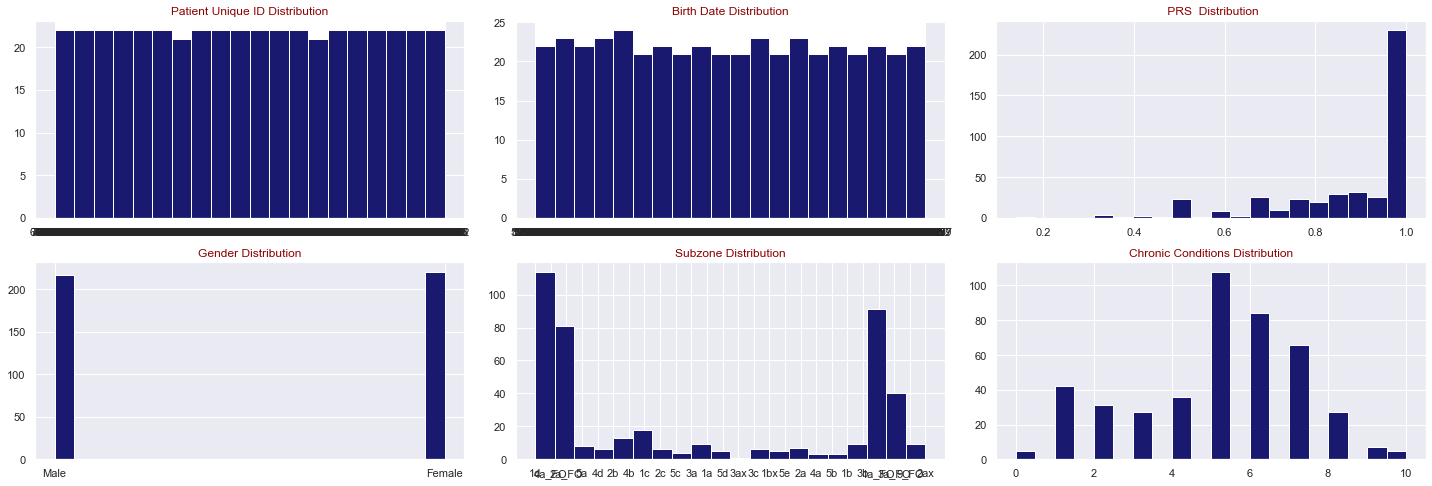

In [15]:
# plot features distribution
fig=plt.figure(figsize=(20,20))
columns_list = df.columns 
# Create for loop to navigate through the column list
for i, feature in enumerate(columns_list):
    ax=fig.add_subplot(6,3,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
    ax.set_title(feature+" Distribution", color='DarkRed')
        
fig.tight_layout()  
plt.show()

#### Quick Note
* The patients in this dataset are very close in age
* Most of the patients are likely to keep their appts (PRS=1)
* Gender is equally distributed
* Chronic Condition has somewhat of a bell shape - indicating normal distribution

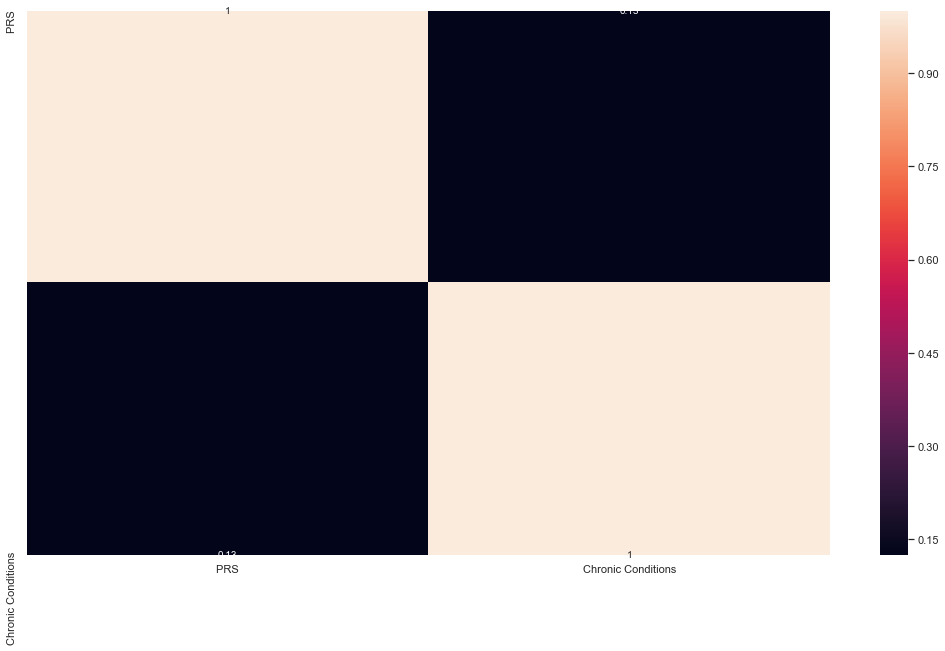

In [16]:
# Attempting to find the relationship among attributes using heatmap
fig = plt.gcf()
fig.set_size_inches(18, 10)
sns.heatmap(df.corr(), annot = True)
plt.show()

##### Note:
 * Don't see any relationship here

In [17]:
# convert birth date to age
import datetime as dt
ref_date = dt.datetime.now()
df['age'] = df['Birth Date'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y'))) 
df['age'].sort_values()

6       28
133     31
168     32
391     32
626     33
      ... 
640     95
1       96
245     98
225     99
832    121
Name: age, Length: 438, dtype: int64

In [18]:
df.head()

,Patient Unique ID,Birth Date,PRS,Gender,Subzone,Chronic Conditions,age
0,67130544,5/26/1974,0.7,Male,1d,0.0,46
1,73838640,8/31/1924,1.0,Male,4a_FO,5.0,96
2,73576382,2/8/1954,1.0,Female,2a_FO,6.0,66
3,74030096,3/15/1934,1.0,Female,2a_FO,6.0,86
4,73981356,5/18/1938,1.0,Female,2a_FO,7.0,82


In [45]:
# gender distribution
df['Gender'].value_counts()

Female    221
Male      217
Name: Gender, dtype: int64

In [20]:
# view the range of 'Chronic Conditions'
df['Chronic Conditions']

0      0.0
1      5.0
2      6.0
3      6.0
4      7.0
      ... 
829    3.0
830    2.0
831    4.0
832    2.0
835    2.0
Name: Chronic Conditions, Length: 438, dtype: float64

In [21]:
# count the sume of each category in Subzone
df['Subzone'].value_counts()

0         1d
1      4a_FO
2      2a_FO
3      2a_FO
4      2a_FO
       ...  
829       3b
830       1b
831       1c
832       1c
835       2a
Name: Subzone, Length: 438, dtype: object

In [27]:
# count the sum of each age
df['age'].value_counts()

76    21
66    16
82    16
85    16
71    15
      ..
92     1
95     1
96     1
98     1
28     1
Name: age, Length: 63, dtype: int64

In [58]:
# check for range of 'PRS'
df[' PRS '].value_counts()

1.00    223
0.67     26
0.50     23
0.88     17
0.75     16
0.80     14
0.83     12
0.86      9
0.94      8
0.89      7
0.92      7
0.93      7
0.60      5
0.78      5
0.96      5
0.71      4
0.81      4
0.91      4
0.85      4
0.33      4
0.90      4
0.84      3
0.73      3
0.95      3
0.70      3
0.97      2
0.57      2
0.82      1
0.45      1
0.63      1
0.40      1
0.14      1
0.58      1
0.38      1
0.77      1
0.62      1
0.54      1
0.87      1
0.44      1
0.79      1
0.76      1
Name:  PRS , dtype: int64

In [69]:
df = df.rename(columns={'Chronic Conditions':'Chronic_Conditions',' PRS ':'Patient_Reliability_Score'})
df.head()

,Patient Unique ID,Birth Date,Patient_Reliability_Score,Gender,Subzone,Chronic_Conditions,age
0,67130544,5/26/1974,0.7,Male,1d,0.0,46
1,73838640,8/31/1924,1.0,Male,4a_FO,5.0,96
2,73576382,2/8/1954,1.0,Female,2a_FO,6.0,66
3,74030096,3/15/1934,1.0,Female,2a_FO,6.0,86
4,73981356,5/18/1938,1.0,Female,2a_FO,7.0,82


In [70]:
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols

# Define the predictors and dependent variable
result = 'Patient_Reliability_Score'
x_cols=['Gender','age','Subzone','Chronic_Conditions']
# Build the model
predictors = '+'.join(x_cols)
formula = result + '~' + predictors
model= ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Patient_Reliability_Score   R-squared:                       0.087
Model:                                   OLS   Adj. R-squared:                  0.025
Method:                        Least Squares   F-statistic:                     1.393
Date:                       Sun, 23 Feb 2020   Prob (F-statistic):             0.0905
Time:                               09:30:42   Log-Likelihood:                 183.88
No. Observations:                        438   AIC:                            -309.8
Df Residuals:                            409   BIC:                            -191.4
Df Model:                                 28                                         
Covariance Type:                   nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7879      0.076     10.362      0.000       0.638       0.937
Gender[T.Male]         0.0105      0.016      0.654      0.513      -0.021       0.042
Subzone[T.1a_FO]      -0.0192      0.068     -0.282      0.778      -0.153       0.114
Subzone[T.1b]         -0.0210      0.103     -0.203      0.839      -0.224       0.182
Subzone[T.1bx]        -0.1664      0.132     -1.260      0.208      -0.426       0.093
Subzone[T.1c]         -0.1285      0.074     -1.748      0.081      -0.273       0.016
Subzone[T.1d]         -0.0961      0.081     -1.182      0.238      -0.256       0.064
Subzone[T.2a]         -0.0571      0.088     -0.647      0.518      -0.231       0.116
Subzone[T.2a_FO]      -0.0366      0.069     -0.534      0.594      -0.171       0.098
Subzone[T.2ax]         0.0673      0.132      0.509      0.611      -0.193       0.327
Subzone[T.2b]         -0.0082      0.092     -0.089      0.929      -0.188       0.172
Subzone[T.2c]         -0.1388      0.092     -1.510      0.132      -0.320       0.042
Subzone[T.3a]         -0.1651      0.132     -1.250      0.212      -0.425       0.095
Subzone[T.3a_FO]      -0.0547      0.071     -0.769      0.442      -0.194       0.085
Subzone[T.3ax]         0.0276      0.176      0.156      0.876      -0.319       0.374
Subzone[T.3b]          0.0511      0.097      0.529      0.597      -0.139       0.241
Subzone[T.3c]         -0.0445      0.092     -0.484      0.628      -0.225       0.136
Subzone[T.4a]          0.0011      0.114      0.009      0.993      -0.223       0.225
Subzone[T.4a_FO]      -0.0343      0.068     -0.507      0.612      -0.167       0.099
Subzone[T.4b]          0.0371      0.088      0.421      0.674      -0.136       0.210
Subzone[T.4d]         -0.0305      0.092     -0.332      0.740      -0.211       0.150
Subzone[T.5a]         -0.0689      0.085     -0.808      0.420      -0.237       0.099
Subzone[T.5b]         -0.0482      0.114     -0.423      0.672      -0.272       0.175
Subzone[T.5c]          0.0315      0.103      0.305      0.761      -0.172       0.235
Subzone[T.5d]          0.0541      0.097      0.560      0.576      -0.136       0.244
Subzone[T.5e]         -0.2431      0.114     -2.135      0.033      -0.467      -0.019
Subzone[T.9_FO]        0.0209      0.091      0.228      0.819      -0.159       0.200
age                    0.0016      0.001      2.206      0.028       0.000       0.003
Chronic_Conditions     0.0025      0.005      0.479      0.632      -0.008       0.013
==============================================================================
Omnibus:                       99.384   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       